In [7]:
import os 
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image_dataset_from_directory                                                                                             

In [8]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf 

weights_file = "inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

pretrained_model = tf.keras.applications.inception_v3.InceptionV3(input_shape = (150, 150, 3), 
include_top = False, weights = None)

pretrained_model.load_weights(weights_file)

In [9]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [10]:
pretrained_model.summary()

161[0][0]             
__________________________________________________________________________________________________
conv2d_163 (Conv2D)             (None, 7, 7, 192)    147456      average_pooling2d_15[0][0]       
__________________________________________________________________________________________________
batch_normalization_154 (BatchN (None, 7, 7, 192)    576         conv2d_154[0][0]                 
__________________________________________________________________________________________________
batch_normalization_157 (BatchN (None, 7, 7, 192)    576         conv2d_157[0][0]                 
__________________________________________________________________________________________________
batch_normalization_162 (BatchN (None, 7, 7, 192)    576         conv2d_162[0][0]                 
__________________________________________________________________________________________________
batch_normalization_163 (BatchN (None, 7, 7, 192)    576         conv2d_163[0][0]     

In [13]:
last_layer = pretrained_model.get_layer('mixed7')
last_layer_output = last_layer.output

In [14]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf 
from tensorflow import keras

x = layers.Flatten()(last_layer_output)
x = layers.Dense(1024, activation = tf.nn.relu)(x)
x = layers.Dense(0.2)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(pretrained_model.input, x)
model.compile(optimizer = keras.optimizers.RMSprop(lr = 0.001),
    loss = 'binary_crossentropy', metrics = ['acc'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale = 1./255,
rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, 
zoom_range = 0.2, horizontal_flip = True)

val_data_gen = ImageDataGenerator(rescale = 1./255,
rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, 
zoom_range = 0.2, horizontal_flip = True)

In [14]:
import os
base_dir = os.path.join("C:/Users/kzhan/Desktop/dogs-vs-cats")
train_dir = os.path.join(base_dir + '/train')
validation_dir = os.path.join(base_dir + '/test1')

train_cats_dir = os.path.join(train_dir + 'cats')

train_dogs_dir = os.path.join(train_dir + 'dogs')

validation_cats_dir = os.path.join(validation_dir + 'cats')

validation_dogs_dir = os.path.join(validation_dir + 'dogs')

img_height, img_width = 150, 150

train_generator = train_data_gen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (img_height, img_width))

val_generator = val_data_gen.flow_from_directory(
    validation_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (img_height, img_width))

Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


In [15]:
history = model.fit_generator(
    train_generator,
    validation_data = val_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_steps = 50,
    verbose = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 - 53s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 1.0000
Epoch 2/100
100/100 - 51s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 1.0000
Epoch 3/100
100/100 - 52s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 1.0000
Epoch 4/100
100/100 - 52s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 1.0000
Epoch 5/100
100/100 - 50s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 1.0000
Epoch 6/100
100/100 - 50s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 1.0000
Epoch 7/100
100/100 - 50s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 1.0000
Epoch 8/100
100/100 - 50s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 1.0000
Epoch 9/100
100/100 - 50s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 1.0000
Epoch 10/100
100/100 - 50s - loss: 0.6931 - acc: 1.0000 - val_loss: 0.6931 - val_acc: 1.0000
Epo

KeyboardInterrupt: 

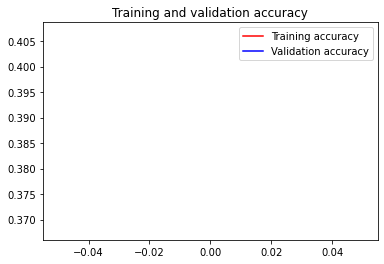

<Figure size 432x288 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()